In [8]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from hmmlearn.hmm import GaussianHMM
import re
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import warnings                                  
warnings.filterwarnings('ignore')

#### Подгрузим наши данны

In [4]:
series = pd.read_csv('Series/monthly-car-sales.csv')['Sales']

# Дифференцируем, чтобы убрать тренд
series_diff = np.diff(series, 1)

In [29]:
# Разделим на train test для проверки качества модели
train_values = v[:90].reshape(-1, 1)
test_values = series_diff[90:].reshape(-1, 1)

In [30]:
for n in range(1, 14):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(train_values)
    print (n, model.score(train_values).round())

1 -857.0
2 -854.0
3 -847.0
4 -836.0
5 -827.0


Fitting a model with 98 free scalar parameters with only 90 data points will result in a degenerate solution.


6 -821.0
7 -816.0
8 -806.0


Fitting a model with 119 free scalar parameters with only 90 data points will result in a degenerate solution.
Fitting a model with 142 free scalar parameters with only 90 data points will result in a degenerate solution.


9 -793.0
10 -791.0


Fitting a model with 167 free scalar parameters with only 90 data points will result in a degenerate solution.


11 -783.0


Fitting a model with 194 free scalar parameters with only 90 data points will result in a degenerate solution.


12 -772.0
13 -759.0


In [87]:
# обучим модель
model = GaussianHMM(n_components=10,
                        covariance_type="full",
                        n_iter=2000)
model.fit(train_values)
labels = model.predict(train_values)
means = np.zeros_like(train_values)

for i in range(model.n_components):
    means[labels == i] = model.means_[i]

Fitting a model with 119 free scalar parameters with only 90 data points will result in a degenerate solution.


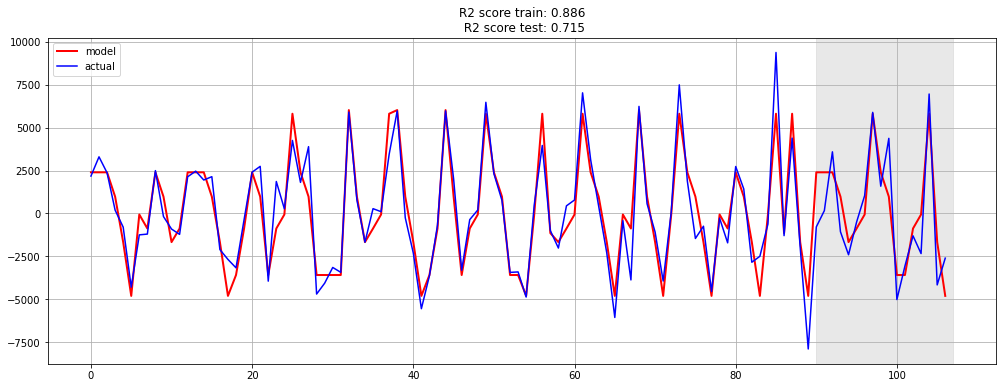

In [89]:
# Построим предсказание
predicted_labels = model.predict(test_values)
predicted_means = np.zeros_like(test_values)

for i in range(model.n_components):
    predicted_means[predicted_labels == i] = model.means_[i]
    
means_concatenated = np.concatenate([means, predicted_means])

error_train = r2_score(train_values, means)
error_test = r2_score(test_values, predicted_means)

plt.figure(figsize=(17, 6))
plt.title('R2 score train: {0:.3f}\n R2 score test: {1:.3f}'.format(error_train, error_test))
plt.plot(means_concatenated, linewidth=2, label="model", color='red')
plt.axvspan(train_values.shape[0], series_diff.shape[0], alpha=0.5, color='lightgrey')
plt.plot(series_diff, label="actual", color='blue')
plt.grid(True)
plt.legend()
plt.show();

Скачайте текст войны и мир (ссылка на github и гугл диск). Очистите его, оставив только русские буквы и символы пробела. Постройте матрицу переходных вероятностей. 

Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р; 
Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы “Б” и имеющее длину 8-мь символов

In [98]:
# Создаем пустой файл txt
!touch all_tom.txt

In [130]:
import os
ls = [i for i in os.listdir('Война и Мир')[1:-1] if i.endswith('.txt')]
ls.sort()

with open('Война и Мир/all_tom.txt', 'w',encoding='utf-8') as f:
    for j in ls:
        s = open('Война и Мир/%s' %j,encoding='utf-8').read()
        f.write(s)
        f.write('\n')

with open('Война и Мир/all_tom.txt', 'r', encoding='utf-8') as f:
    text = f.read().lower()
    
text = re.sub('[^а-я| ]','', text)
text = re.sub('ё','е', text)

#### В литературе обычно не используют рускую букву "ё", а земеняют ее на "е". 
Чтобы в этом точно быть уверенным пройдемся по тексту и заменим на "е"

In [131]:
# Очистим текст, оставив только русские буквы и символы пробела.
a = ord('а')
RUSSIAN = ''.join([chr(i) for i in range(a,a+32)])
RUSSIAN_whitespace = RUSSIAN + ' '
POS = {l: i for i, l in enumerate(RUSSIAN_whitespace)}

In [133]:
# Создадим нулевую матрицу
probabilities = np.zeros((len(RUSSIAN_whitespace), len(RUSSIAN_whitespace)))

In [135]:
for cp, cn in zip(text[:-1], text[1:]):
    probabilities[POS[cp], POS[cn]] +=1

In [136]:
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

In [137]:
df = pd.DataFrame(probabilities, index=(c for c in RUSSIAN_whitespace), columns=(c for c in RUSSIAN_whitespace))

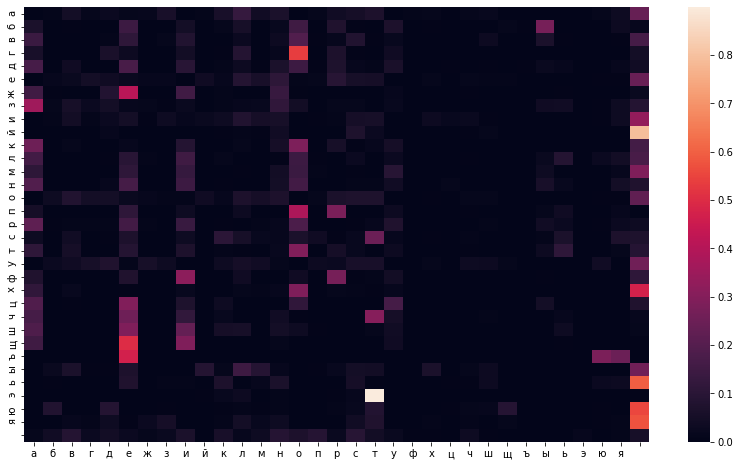

In [138]:
plt.figure(figsize=(14,8))
sns.heatmap(df)
plt.show()

In [139]:
# Посчитаем вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р;
start = POS['п']
end = POS['р']
prior = 1.0 / len(RUSSIAN)
output = []
for c in RUSSIAN:
    for d in RUSSIAN:
        # prior * p(п, a1) * p(a1, a2) * p(a2, р)
        proba = prior * probabilities[start, POS[c]] * probabilities[POS[c], POS[d]] * probabilities[POS[d], end]
        if proba > 0:
                output.append(''.join(['п', c, d, 'р']) + ' {:.10f}'.format(proba))
output[:15]

['паар 0.0000000133',
 'пабр 0.0000010790',
 'павр 0.0000012316',
 'пагр 0.0000013651',
 'падр 0.0000031260',
 'паер 0.0000020722',
 'пажр 0.0000000078',
 'пазр 0.0000012852',
 'паир 0.0000000271',
 'пайр 0.0000000293',
 'пакр 0.0000051434',
 'палр 0.0000000036',
 'памр 0.0000001161',
 'панр 0.0000001234',
 'паор 0.0000000461']

In [146]:
# Используя матрицу переходных вероятностей сгенерируем слово, начинающееся с буквы “Б” и имеющее длину 8-мь символов
s = []
start  = 'б'
s.append(start)
length = 7
for i in range(length):
    index = POS[s[i]]
    next_char = np.random.choice(list(RUSSIAN_whitespace), p=probabilities[index])
    #if next_char != ' ':
    s.append(next_char)

print(''.join(s))

былюшидо
